<a href="https://colab.research.google.com/github/Sanjana-2703/Analytics-dashboard/blob/main/Analytics_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Covid-19 Data Analysis 

In [ ]:
#importing libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [ ]:
#reading the data set file
df = pd.read_csv('/content/drive/MyDrive/pyhon april/covid_19_india.csv')

In [ ]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
#here we get all the name of state / union territory which are unique
def drop_star(df):
    for i in df['State/UnionTerritory'].iteritems():
        if i[1][-3:] == "***":
            df.drop(i[0],inplace=True)
        
drop_star(df)
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli',
       'Himanchal Pradesh', 'Karanataka'], dtype=object)

In [ ]:
current = df[df.Date == '2021-08-08']
max_confirmed_cases = current.sort_values(by='Confirmed', ascending = False)
max_confirmed_cases.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
17986,17987,2021-08-08,8:00 AM,Maharashtra,-,-,6139493,133845,6347820
17982,17983,2021-08-08,8:00 AM,Kerala,-,-,3337579,17654,3533918
17981,17982,2021-08-08,8:00 AM,Karnataka,-,-,2855862,36773,2916927
17996,17997,2021-08-08,8:00 AM,Tamil Nadu,-,-,2518777,34289,2573352
17967,17968,2021-08-08,8:00 AM,Andhra Pradesh,-,-,1946370,13513,1980258


In [ ]:
#lets convert the Date feature to Date&time datatype
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

#Time is not required as it doesnt make much difference
df.drop(['Time'],axis=1, inplace=True)

#Renaming State/UnionTerritory to States for easy reference
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df['Discharge_Rate'] = np.round((df['Cured']/df['Confirmed'])*100, decimals = 4)      # create instances for 'death_rate and discharge_rate'
df['Death_Rate'] = np.round((df['Deaths']/df['Confirmed'])*100, decimals = 4)
df.head()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
0,1,2020-01-30,Kerala,1,0,0,0,1,1,0.0,0.0
1,2,2020-01-31,Kerala,1,0,0,0,1,1,0.0,0.0
2,3,2020-02-01,Kerala,2,0,0,0,2,2,0.0,0.0
3,4,2020-02-02,Kerala,3,0,0,0,3,3,0.0,0.0
4,5,2020-02-03,Kerala,3,0,0,0,3,3,0.0,0.0


In [ ]:
# Top cases 
current = df[df.Date == '2021-08-08']
max_confirmed_cases = current.sort_values(by='Confirmed', ascending = False)
max_confirmed_cases.head()
top_cases = max_confirmed_cases[:20]
top_cases.head()


,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
17986,17987,2021-08-08,Maharashtra,-,-,6139493,133845,6347820,74482,96.7181,2.1085
17982,17983,2021-08-08,Kerala,-,-,3337579,17654,3533918,178685,94.4442,0.4996
17981,17982,2021-08-08,Karnataka,-,-,2855862,36773,2916927,24292,97.9065,1.2607
17996,17997,2021-08-08,Tamil Nadu,-,-,2518777,34289,2573352,20286,97.8792,1.3325
17967,17968,2021-08-08,Andhra Pradesh,-,-,1946370,13513,1980258,20375,98.2887,0.6824


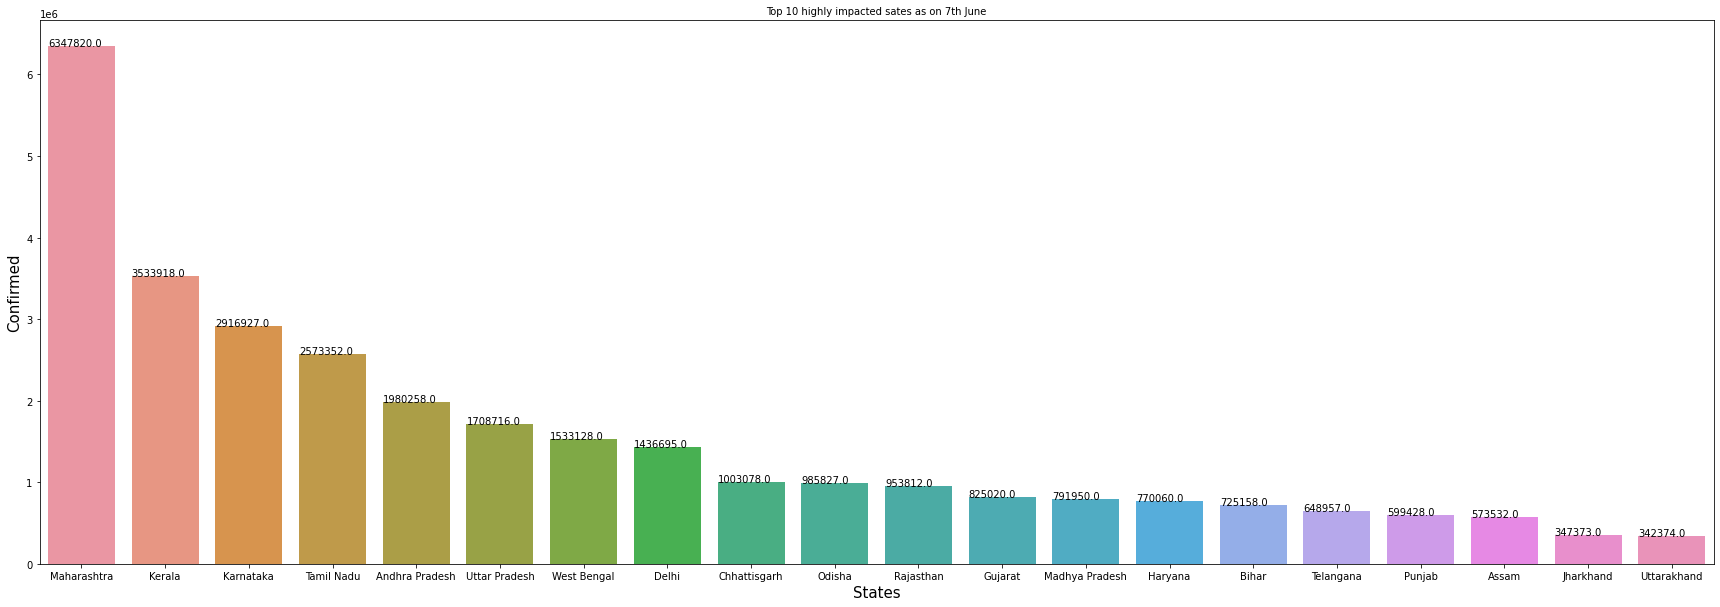

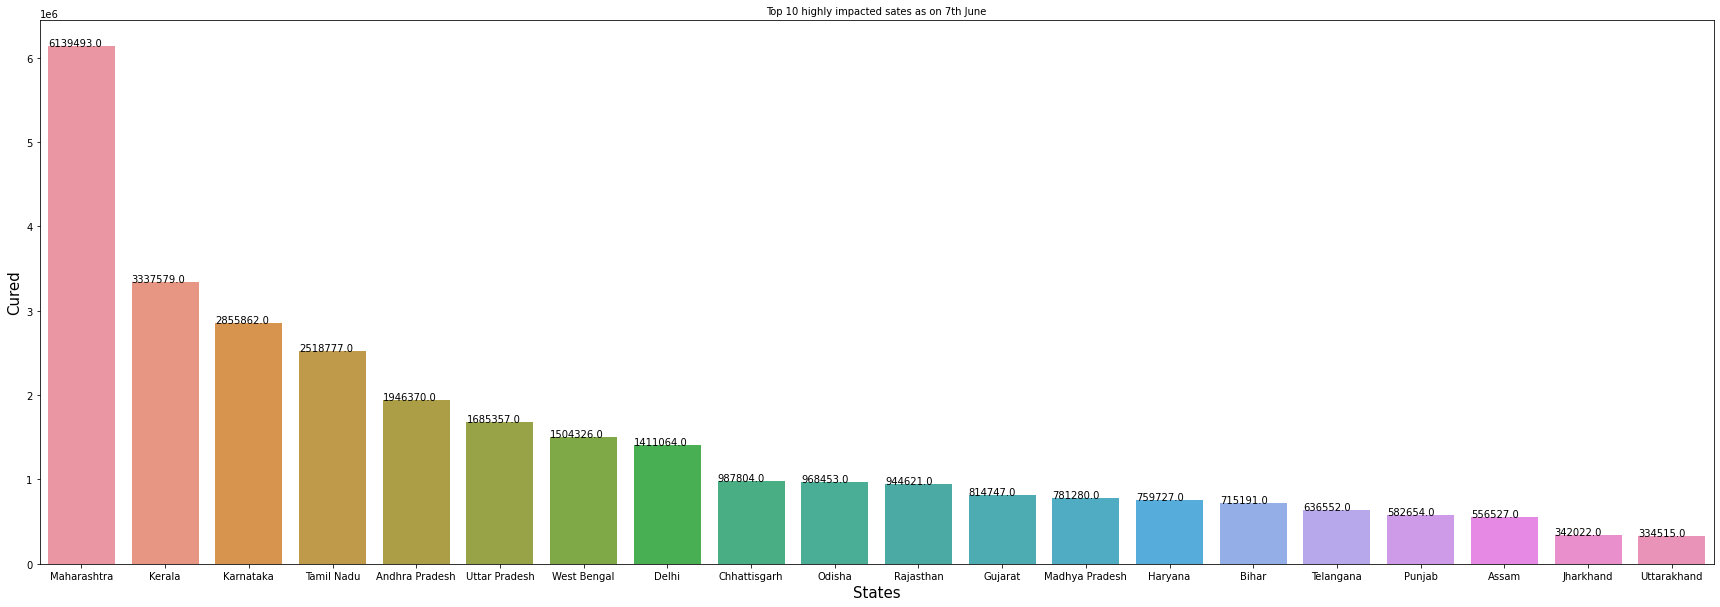

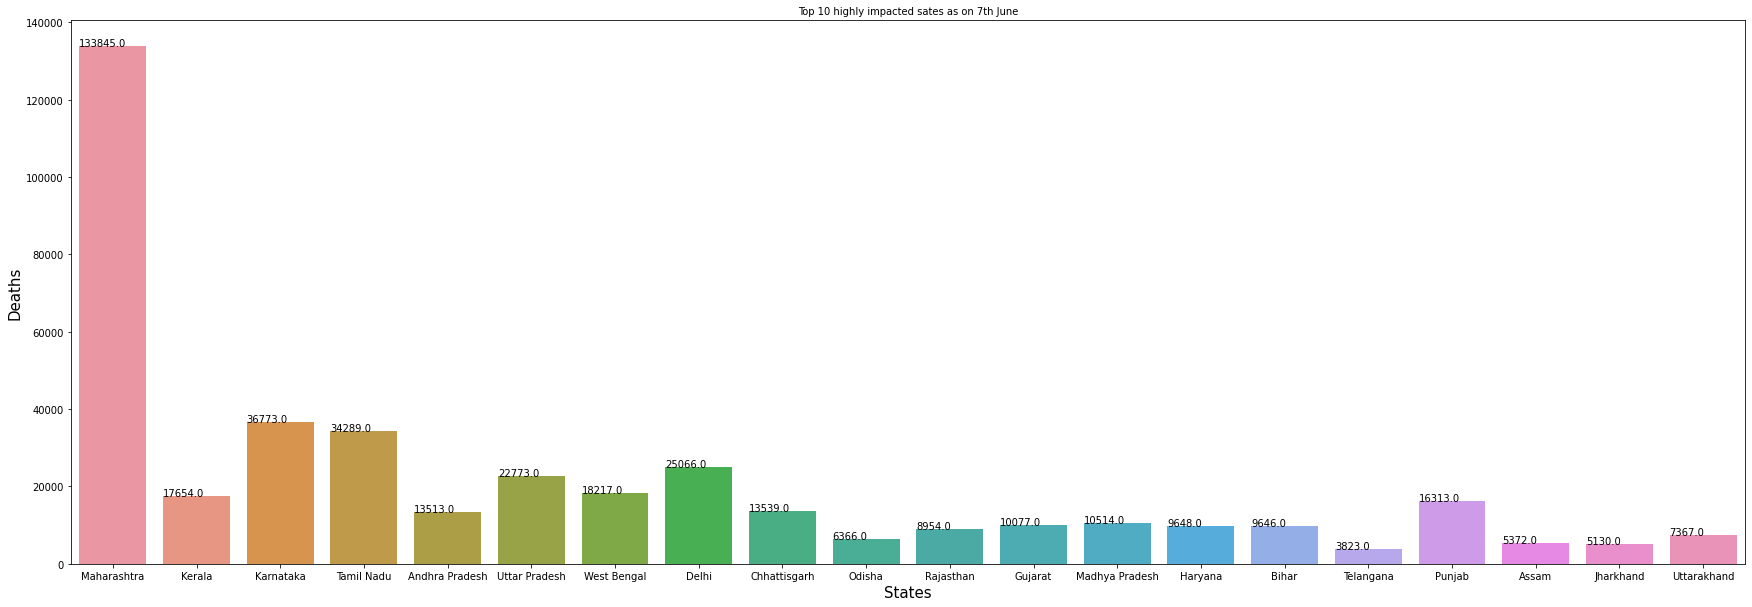

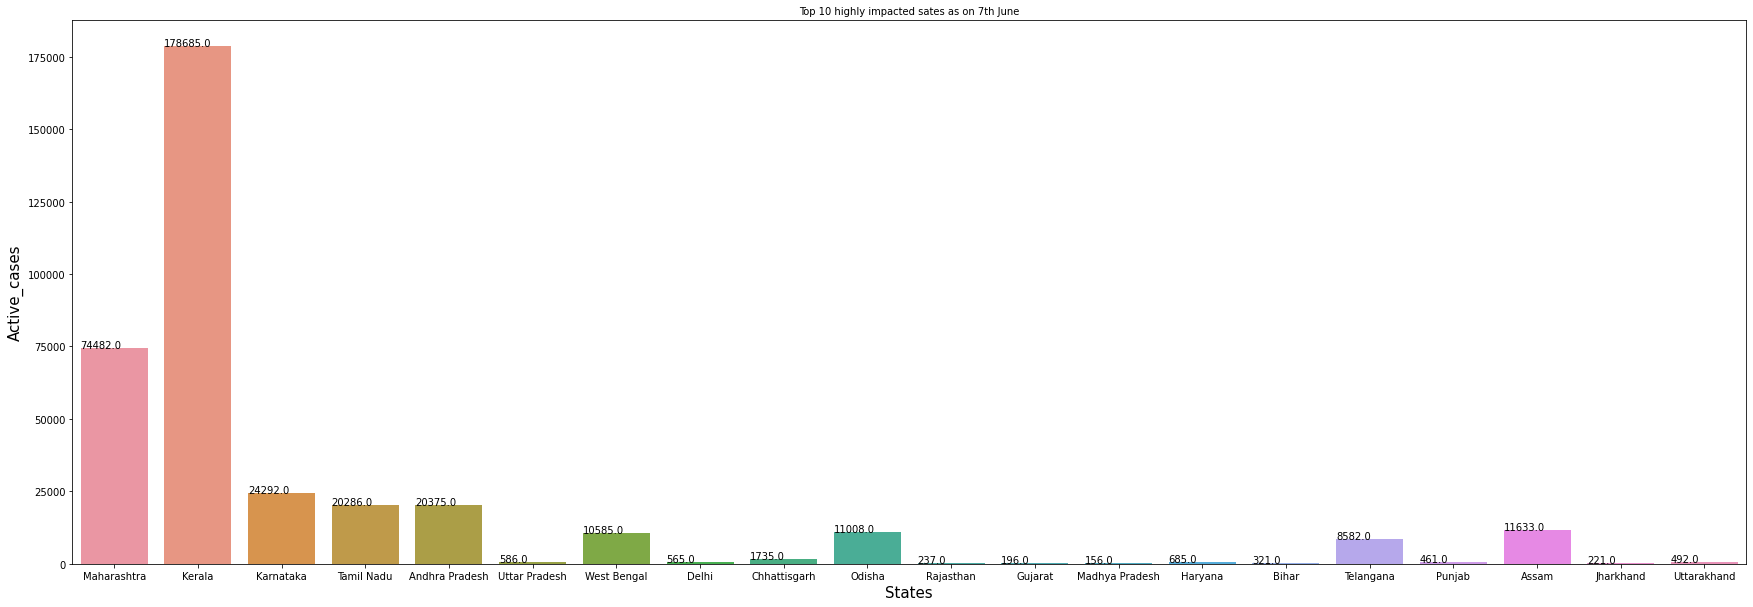

In [ ]:
#plotting a bar graph for top 20 states vs confirmed, cured ,Deaths , Active cases

for feature in top_cases[['Confirmed','Cured','Deaths','Active_cases']]:
    fig=plt.figure(figsize=(30,10))
    plt.title("Top 10 highly impacted sates as on 7th June", size=10)
    ax=sns.barplot(data=top_cases,y=top_cases[feature],x='States', linewidth=0, edgecolor='black')
    plt.xlabel('States', size = 15)
    plt.ylabel(feature, size = 15)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())
plt.show()

In [ ]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra', 'Tamil Nadu', 'Andhra Pradesh', 'Uttar Pradesh']
mh=df[df['States']=='Maharashtra']
kl=df[df['States']=='Kerala']
ka=df[df['States']=='Karnataka']
tn=df[df['States']=='Tamil Nadu']
ap=df[df['States']=='Andhra Pradesh']
up=df[df['States']=='Uttar Pradesh']

In [ ]:
 df['Date']= pd.to_datetime(df['Date'])          # Date is converted to DateTime format.
data_20 = df[df['Date'].dt.year==2020]           # Considering data of only the year 2020.   
data_21 = df[df['Date'].dt.year==2021]           # Considering data of only the year 2021.  

data_20['Month']=data_20['Date'].dt.month                    
data_21['Month']=data_21['Date'].dt.month    

# creating instances for 'confirmed','deaths','discharged' by month column

#Year 2020
data_confirm_20= data_20['Confirmed'].groupby(data_20['Month']).sum()
data_dis_20= data_20['Cured'].groupby(data_20['Month']).sum()      
data_death_20= data_20['Deaths'].groupby(data_20['Month']).sum()

#Year 2021
data_confirm_21= data_21['Confirmed'].groupby(data_21['Month']).sum()
data_dis_21= data_21['Cured'].groupby(data_21['Month']).sum()      
data_death_21= data_21['Deaths'].groupby(data_21['Month']).sum()

cols_20=[data_confirm_20,data_dis_20,data_death_20]
data_20=pd.concat(cols_20,axis=1)  

cols_21=[data_confirm_21,data_dis_21,data_death_21]
data_21=pd.concat(cols_21,axis=1) 

#Year 2020
data_20['discharge_rate_20'] = np.round((data_20['Cured']/data_20['Confirmed'])*100, decimals=4)      
data_20['death_rate_20'] = np.round((data_20['Deaths']/data_20['Confirmed'])*100, decimals=4)

#Year 2020
data_21['discharge_rate_21'] = np.round((data_21['Cured']/data_21['Confirmed'])*100, decimals=4)      
data_21['death_rate_21'] = np.round((data_21['Deaths']/data_21['Confirmed'])*100, decimals=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Year 2021
data_21.reset_index(inplace=True)
data_21.head()

,index,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
0,10082,10083,2021-01-01,Andhra Pradesh,-,-,871916,7108,882286,3262,98.8246,0.8056
1,10083,10084,2021-01-01,Andaman and Nicobar Islands,-,-,4826,62,4945,57,97.5935,1.2538
2,10084,10085,2021-01-01,Arunachal Pradesh,-,-,16564,56,16719,99,99.0729,0.3349
3,10085,10086,2021-01-01,Assam,-,-,211910,1045,216211,3256,98.0107,0.4833
4,10086,10087,2021-01-01,Bihar,-,-,245476,1397,251743,4870,97.5106,0.5549


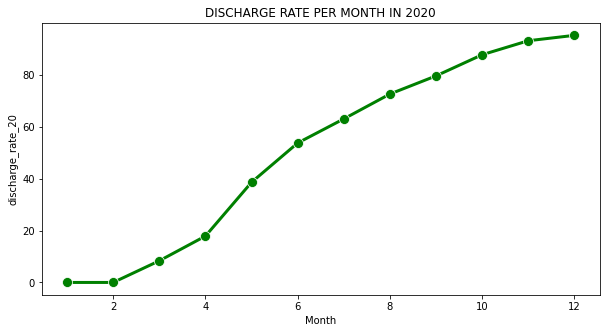

In [ ]:
# Line plot for discharge rate in year 2020 and 2021

plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_20",data=data_20,color="g",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH IN 2020')
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_21",data=data_21,color="g",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH IN 2021')
plt.show()

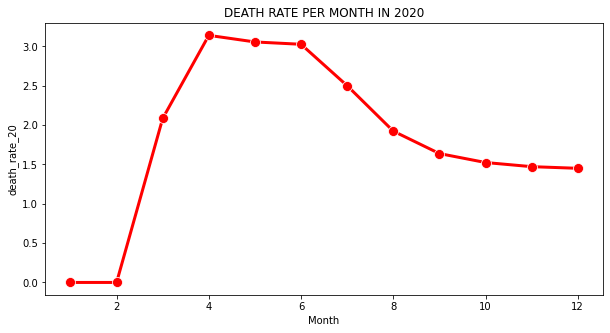

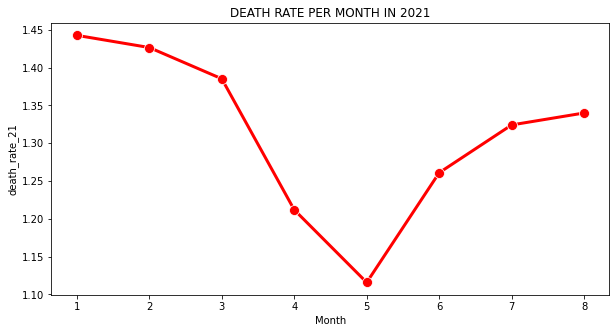

In [ ]:
# Line plot for discharge rate in year 2020 and 2021

plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_20",data=data_20,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2020')
plt.show()


plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_21",data=data_21,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2021')
plt.show()